importing libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

importing dataset

In [ ]:
dataset_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
dataset_test=pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [ ]:
train_set=dataset_train.iloc[:,1:2].values

In [ ]:
train_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train_set.shape


(1258, 1)

# feature scaling (in rnn(neural networks) it is advisable to use normalisation(min max scaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_train_set=sc.fit_transform(train_set)

# data structure with 60 timesteps and 1 output (means RNN will check 60 days stockprice before time T and will predict output

In [ ]:
x_train =[]
y_train =[]
for i in range(60,1258):
  x_train.append(scaled_train_set[i-60:i,0])           #range(0:60,0),(1:61,0).......last index exclusive
  y_train.append(scaled_train_set[i,0])                #[60],[61],............
x_train,y_train = np.array(x_train),np.array(y_train)  # means last value of x_train[1] i.e. 60th value= y_train[0]

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
x_train[:2]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.0

In [ ]:
y_train[:2]

array([0.08627874, 0.08471612])

# reshaping adding more dimensionality because rnn input takes 3d array

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1198, 60, 1)

In [ ]:
x_train[:2]

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        [0.09156187],
        [0.07984225],
        [0.0643277 ],
        [0.0585423 ],
        [0.06568569],
        [0.06109085],
        [0.06639259],
        [0.0614257 ],
        [0.07474514],
        [0.02797827],
        [0.02379269],
        [0.02409033],
        [0.0159238 ],
        [0.01078949],
        [0.00967334],
        [0.01642607],
        [0.02100231],
        [0.02280676],
        [0.02273235],
        [0.02810849],
        [0.03212665],
        [0.0433812 ],
        [0.04475779],
        [0.04790163],
        [0.0440695 ],
        [0.04648783],
        [0.04745517],
        [0.04873875],
        [0.03936305],
        [0.04137213],
        [0.04034898],
        [0.04784582],
        [0.04325099],
        [0.04356723],
        [0.04286033],
        [0.04602277],
        [0.05398467],
        [0.05738894],
        [0.05714711],
        [0.05569611],
        [0.04421832],
        [0.04514845],
        [0

# Building rnn

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [ ]:
regressor=Sequential()

In [ ]:
regressor.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))  #return_sequence=True if more LSTM layers
regressor.add(Dropout(0.2))                                                     #to be added otherwise false
regressor.add(LSTM(50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(1))

In [ ]:
regressor.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 8s 15ms/step - loss: 0.0401
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 13/100
38/38 [=====

# evaluating

importing the real_stock_price test_set

In [ ]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

predicting the output

In [ ]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)


In [ ]:
print(dataset_total.head())

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64


In [ ]:
inputs=dataset_total.iloc[len(dataset_total)-len(dataset_test)-60:].values

In [ ]:
inputs[:5]

array([779.  , 779.66, 777.71, 786.66, 783.76])

we can skip iloc using iloc can give us 2d array but here not because the datset_total dataframe have only one column so if we pass len(dataset_total):len(dataset_test),:  then we will have error because less indexes so we will reshape the array by (-1,1) -1 gives no of rows automatically in reshape

In [ ]:
inputs=inputs.reshape(-1,1)

In [ ]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [ ]:
inputs.shape

(80, 1)

scaling test inputs

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])


In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [ ]:
x_test.shape

(20, 60, 1)

In [ ]:
pred_stock_price=regressor.predict(x_test)

1/1 [==============================] - 0s 23ms/step


In [ ]:
pred_stock_price

array([[0.9406208 ],
       [0.935053  ],
       [0.9359641 ],
       [0.93894696],
       [0.9456266 ],
       [0.9570612 ],
       [0.96702266],
       [0.9706023 ],
       [0.9710326 ],
       [0.97085285],
       [0.9709785 ],
       [0.97103155],
       [0.9709674 ],
       [0.97200656],
       [0.9735786 ],
       [0.98245287],
       [0.9954679 ],
       [1.0091172 ],
       [1.0158852 ],
       [1.0068438 ]], dtype=float32)

In [ ]:
pred_stock_price=sc.inverse_transform(pred_stock_price)

In [ ]:
pred_stock_price

array([[784.7601 ],
       [781.7671 ],
       [782.25684],
       [783.8603 ],
       [787.451  ],
       [793.5978 ],
       [798.9527 ],
       [800.87695],
       [801.1083 ],
       [801.01166],
       [801.07916],
       [801.10767],
       [801.07324],
       [801.63184],
       [802.47687],
       [807.2473 ],
       [814.2437 ],
       [821.58105],
       [825.21924],
       [820.35895]], dtype=float32)

In [ ]:
np.concatenate((real_stock_price,pred_stock_price),1)

array([[778.81      , 784.7600708 ],
       [788.36      , 781.76708984],
       [786.08      , 782.25683594],
       [795.26      , 783.86029053],
       [806.4       , 787.45098877],
       [807.86      , 793.59777832],
       [805.        , 798.95269775],
       [807.14      , 800.87695312],
       [807.48      , 801.10827637],
       [807.08      , 801.01165771],
       [805.81      , 801.0791626 ],
       [805.12      , 801.10766602],
       [806.91      , 801.07324219],
       [807.25      , 801.63183594],
       [822.3       , 802.47686768],
       [829.62      , 807.24731445],
       [837.81      , 814.24371338],
       [834.71      , 821.58105469],
       [814.66      , 825.21923828],
       [796.86      , 820.35894775]])

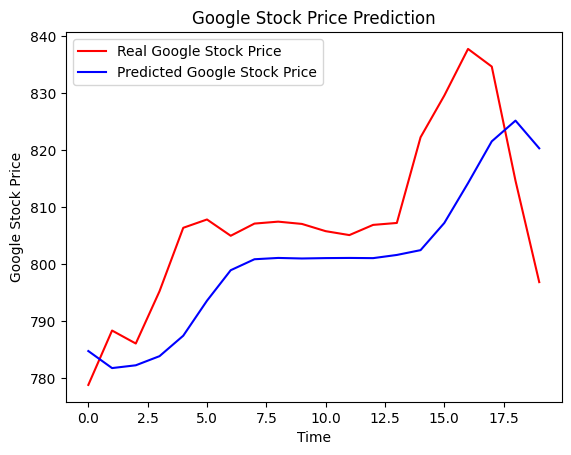

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()